In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from simulate_groups import simulate_cov_groups, simulate_ll

%load_ext autoreload
%autoreload 2

### Simulate data with block covariance structure

Text(0.5, 1, 'Covariance matrix')

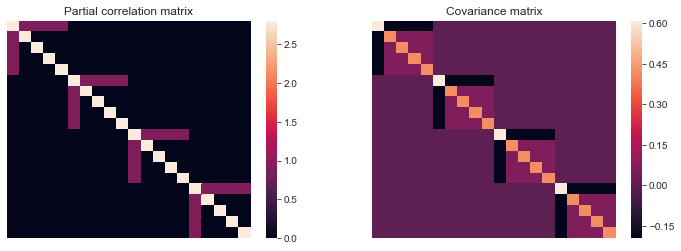

In [2]:
theta_1, sigma_1, _ = simulate_cov_groups(20, 4)

sns.set({'figure.figsize': (12, 4)})
fig, axarr = plt.subplots(1, 2)

sns.heatmap(theta_1, ax=axarr[0])
axarr[0].get_xaxis().set_visible(False)
axarr[0].get_yaxis().set_visible(False)
axarr[0].set_title('Partial correlation matrix')
sns.heatmap(sigma_1, ax=axarr[1])
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[1].set_title('Covariance matrix')

In [3]:
n = 1000
p = theta_1.shape[0]

# sample some data from MVN with the given covariance matrix
X = np.random.multivariate_normal(mean=np.zeros(p),
                                  cov=sigma_1,
                                  size=(n,),
                                  check_valid='warn')

# calculate covariance/precision matrix from data
sigma_hat = np.cov(X, rowvar=False)
theta_hat = np.linalg.inv(sigma_hat)

Text(0.5, 1, 'Partial correlations estimated from data')

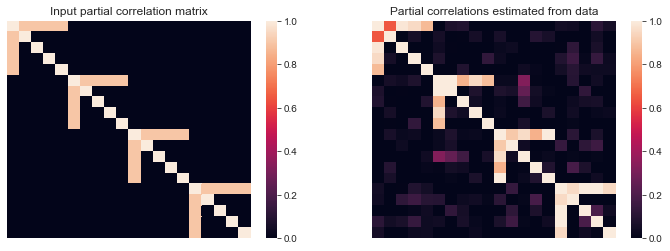

In [4]:
sns.set({'figure.figsize': (12, 4)})
fig, axarr = plt.subplots(1, 2)

# high/low diagonal values can skew the plot, so just bound them
theta_1[theta_1 > 1] = 1
theta_1[theta_1 < 0] = 0
theta_hat[theta_hat > 1] = 1
theta_hat[theta_hat < 0] = 0

sns.heatmap(theta_1, ax=axarr[0])
axarr[0].get_xaxis().set_visible(False)
axarr[0].get_yaxis().set_visible(False)
axarr[0].set_title('Input partial correlation matrix')
sns.heatmap(theta_hat, ax=axarr[1])
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[1].set_title('Partial correlations estimated from data')

### Simulate labels from data

In [5]:
X, y, info_dict = simulate_ll(n=10,
                              p=20,
                              uncorr_frac=0.1,
                              num_groups=5,
                              group_sparsity=0.5,
                              seed=1)
print(X[:5, :5])

(19,)
(10, 18)
[[-0.76531295  1.01170378  1.7314438  -0.08989119  0.43355888]
 [ 0.26467424  0.66491765 -0.28598222  0.18289593  1.01216049]
 [ 0.91280417 -0.06013356 -1.47624147  0.38055799 -0.77553074]
 [ 0.63433943  0.34782878  0.15300336  0.08619171 -0.09002897]
 [-0.24473074  0.09184639 -0.24312146  0.11939815 -0.26563796]]


In [6]:
print(np.count_nonzero(y) / y.shape[0])
print(y)

0.2
[0 0 0 0 0 1 0 1 0 0]


In [7]:
print({k: v for k, v in info_dict.items() if k != 'sigma'})

{'betas': array([-0.2361257 , -0.2361257 , -0.2361257 , -0.2361257 , -1.70671527,
       -1.70671527, -1.70671527, -1.70671527,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.27771126]), 'pis': array([[0.17696443],
       [0.16921831],
       [0.01052837],
       [0.00943588],
       [0.2152932 ],
       [0.53709481],
       [0.06857528],
       [0.72547242],
       [0.07560652],
       [0.3306583 ]]), 'groups': [array([0, 1, 2, 3]), array([4, 5, 6, 7]), array([ 8,  9, 10, 11]), array([12, 13, 14]), array([15, 16, 17])], 'is_correlated': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False])}


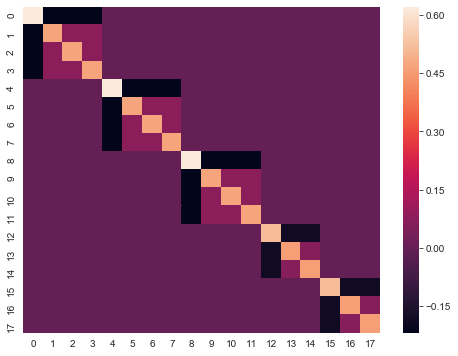

In [8]:
sns.set({'figure.figsize': (8, 6)})
sns.heatmap(info_dict['sigma'])